In [2]:
# Data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb

sunshine = pd.read_csv("Dataset/sunshine.csv")
temp = pd.read_csv("Dataset/temp.csv")
wind = pd.read_csv("Dataset/wind.csv")

train_data = sunshine.merge(temp, on=['Day', 'Hour'], how='left')
train_data = train_data.merge(wind, on=['Day', 'Hour'], how='left')

sunshine1 = sunshine.iloc[0:150, :]
sunshine1['Day'] = sunshine1['Day'].map(lambda x: x + 300)

val_data = sunshine1.merge(temp, on=['Day', 'Hour'], how='left')
val_data = val_data.merge(wind, on=['Day', 'Hour'], how='left')

features = [f for f in train_data.columns if f not in ['Radiation', 'Day']]
X_train, X_test, Y_train, Y_test = train_test_split(train_data[features], train_data['Radiation'].values, test_size=0.1, random_state=42)

/tmp/ipykernel_23072/58629417.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine1['Day'] = sunshine1['Day'].map(lambda x: x + 300)


/mnt/DATA1/wuliubin/miniconda3/envs/metro/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/DATA1/wuliubin/miniconda3/envs/metro/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp', ylabel='Density'>

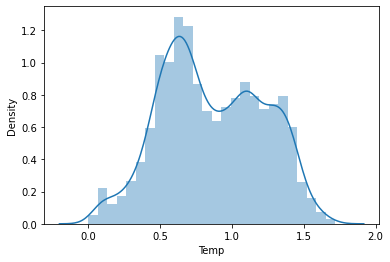

In [5]:
# Plot Histogram
import seaborn as sns
import scipy
sns.distplot(np.expm1(train_data['Temp']))
# sns.distplot(np.log1p(train_data['Radiation']))
# sns.distplot(scipy.special.boxcox1p(train_data['Radiation'], 0.15))
# sns.displot(scipy.stats.boxcox(train_data['Radiation'] + 0.01))
# print(min(train_data['Radiation']))

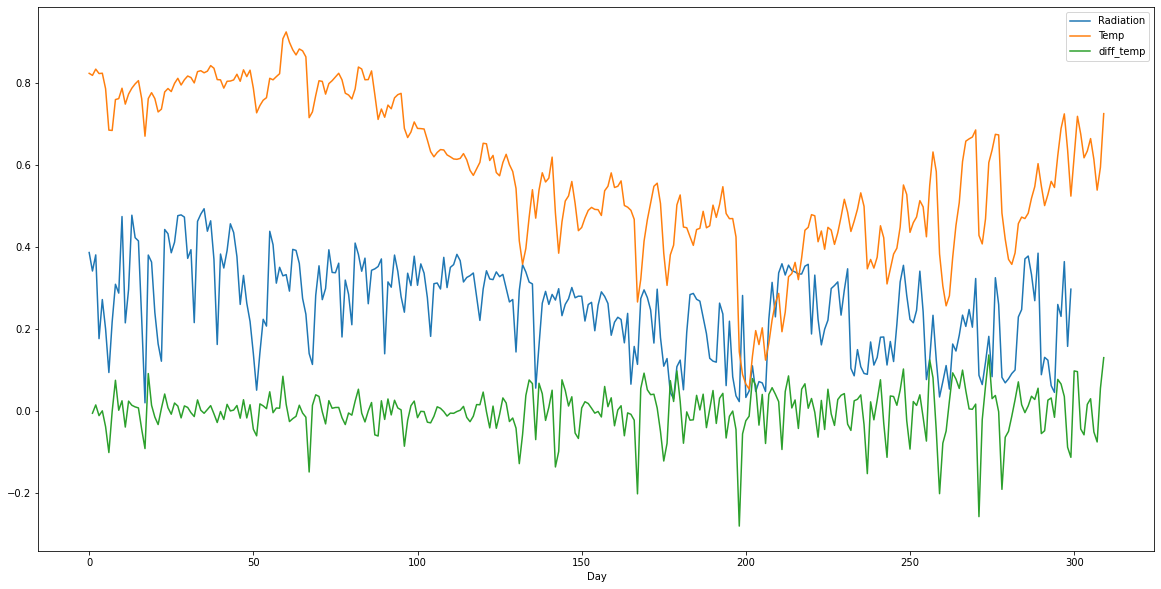

In [4]:
# Plot all data by day
sunshine.groupby(['Day'])['Radiation'].mean().plot(figsize=(20, 10), label='Radiation', legend=True)
temp.groupby(['Day'])['Temp'].mean().plot(figsize=(20, 10), label='Temp', legend=True)
temp = temp.groupby(['Day'])['Temp'].mean().reset_index()
temp['diff_temp'] = temp['Temp'].diff().plot(figsize=(20, 10), label='diff_temp', legend=True)
temp
# temp.groupby(['Day'])['diff_temp'].mean().plot(figsize=(20, 10))
# wind.groupby(['Day'])['Spd'].mean().plot(figsize=(20, 10), label='Spd', legend=True)
# wind['Dir'] = wind['Dir']/300
# wind.groupby(['Day'])['Dir'].mean().plot(figsize=(20, 10), label='Dir', legend=True)


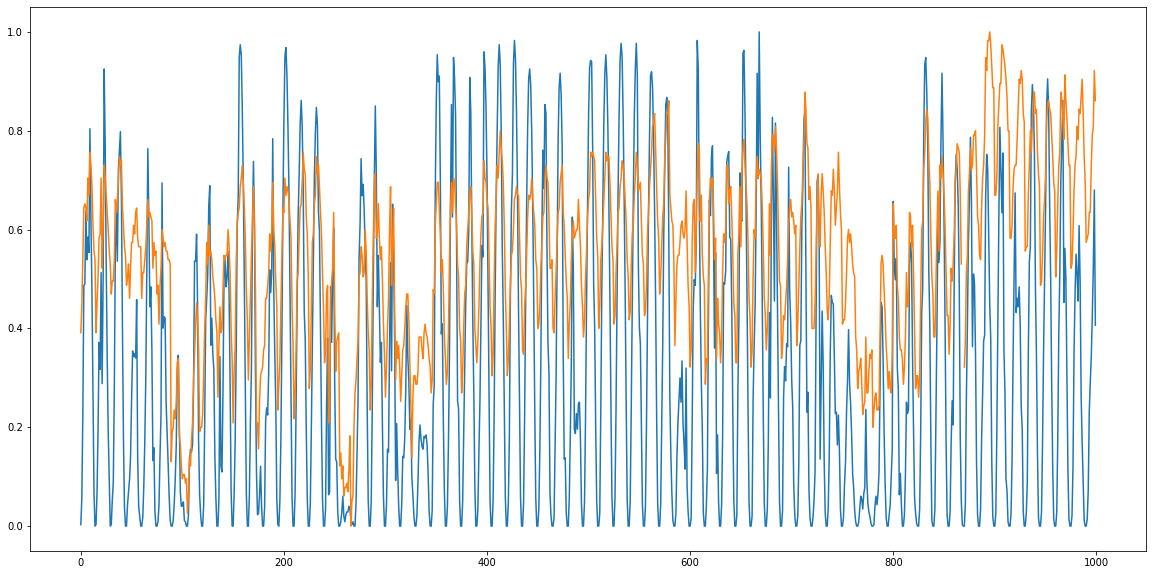

In [34]:
# Plot part of data
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(train_data['Radiation'][0:1000])
plt.plot((train_data['Temp'][0:1000] - np.min(train_data['Temp'][0:1000]))/np.max((train_data['Temp'][0:1000] - np.min(train_data['Temp'][0:1000]))))
# plt.plot(train_data['Dir'][1:10000]/300)
# plt.plot(train_data['Spd'][1:10000])